In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df_cal=pd.read_csv('./Seattle/calendar.csv')
df_list=pd.read_csv('./Seattle/listings.csv')
df_review=pd.read_csv('./Seattle/reviews.csv')

# Look at the Data
Here I first look at each csv file to get an understanding of the data I am working with

In [3]:
df_cal.head(-20)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393545,10208623,2016-12-09,f,NaN
1393546,10208623,2016-12-10,f,NaN
1393547,10208623,2016-12-11,f,NaN
1393548,10208623,2016-12-12,f,NaN


In [4]:
df_cal.shape

(1393570, 4)

In [5]:
df_cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [6]:
df_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
df_list.shape

(3818, 92)

In [8]:
df_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [9]:
df_review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [10]:
df_review.shape

(84849, 6)

# Questions
1) What are the busiest times of the year to visit Seattle? by how much do prices spike?

2) Describe the vibe of the Seattle neighborhood

3) Is there anything about the properties that helps us predict price. For example, can we find negative and positive reviews based on the text?

To answer my questions I need to use the "linsting" dataset. 

## Availability:

In [11]:
#df_cal_1=df_cal.drop('price', axis=1)
df_cal_1=df_cal
#In the "available" column, we replace t with boolean True and f by False so we can work with it easily
df_cal_1['available'].replace({'f': False, 't': True}, inplace=True);

df_cal_1['date']=pd.to_datetime(df_cal_1['date'], format='%Y-%m-%d', errors='coerce')
#df_cal_1.dtypes
df_cal_1['Year']=df_cal_1['date'].dt.strftime('%Y')
df_cal_1['Month']=df_cal_1['date'].dt.strftime('%m')
df_cal_1
#print(type(df_cal_1['date']))
#for id in df_price.id:
    

,listing_id,date,available,price,Year,Month
0,241032,2016-01-04,True,$85.00,2016,01
1,241032,2016-01-05,True,$85.00,2016,01
2,241032,2016-01-06,False,NaN,2016,01
3,241032,2016-01-07,False,NaN,2016,01
4,241032,2016-01-08,False,NaN,2016,01
...,...,...,...,...,...,...
1393565,10208623,2016-12-29,False,NaN,2016,12
1393566,10208623,2016-12-30,False,NaN,2016,12
1393567,10208623,2016-12-31,False,NaN,2016,12
1393568,10208623,2017-01-01,False,NaN,2017,01


The reason for not being available is not clear in the dataset. It can be because the place is already booked or the owner has blocked it. If non-available only meant that it was booked then we could use the data to reflect how popular those places are at certain times of the year. On the other hand, more available places, especially if it is from different hosts or one host with more than one place, may reflect a high season time, meaning as more people usually come to the city more options become available. So in that case I looked at both the availability and non-availability separately.

In [12]:
Available=df_cal_1[df_cal_1['available']==True]
UnAvailable=df_cal_1[df_cal_1['available']==False]
list_group_1=Available.groupby(['listing_id'], as_index=True)['Month'].nunique()
#print(list_group_1)
list_group_2=UnAvailable.groupby(['listing_id'], as_index=True)['Month'].nunique()
#print(list_group_2)

#fig, ax = plt.subplots(figsize=(8,6))
#sns.scatterplot(x='Month', y='listing_id', hue='available', data=list_group) 
#plt.show()

Text(0.04, 0.5, 'Count')

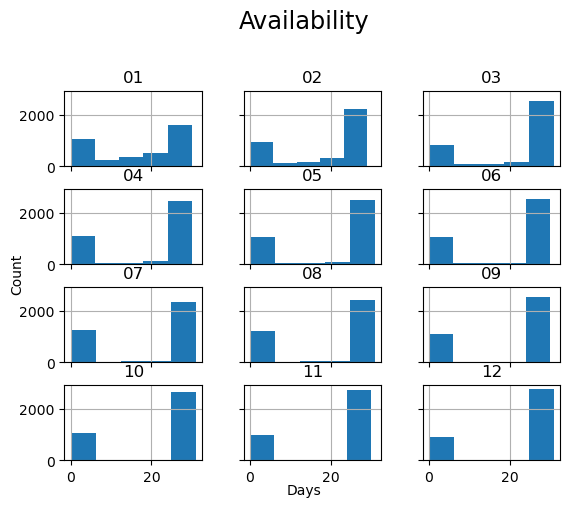

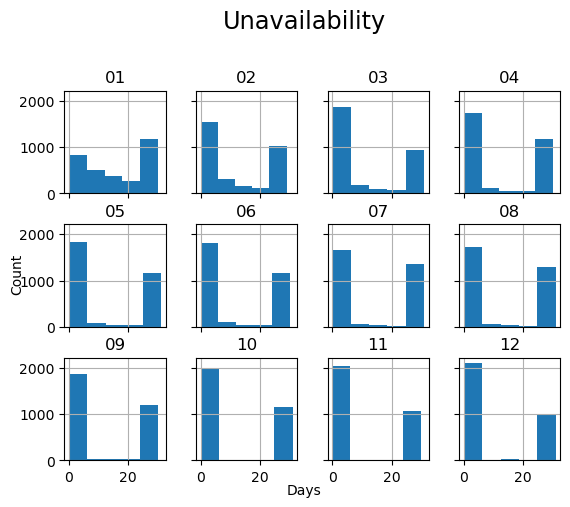

In [13]:
Available_2=pd.get_dummies(Available['Month'])
Available_2=pd.concat([Available.drop('Month', axis=1),Available_2], axis=1)
list_group_2=Available_2.groupby(['listing_id'], as_index=True)[['01', '02', '03',
       '04', '05', '06', '07', '08', '09', '10', '11', '12']].sum()
#print(list_group_2)
fig, axes = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True)
list_group_2.hist(bins=5, ax=axes)
plt.suptitle('Availability', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Days', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')
UnAvailable_2=pd.get_dummies(UnAvailable['Month'])
UnAvailable_2=pd.concat([UnAvailable.drop('Month', axis=1),UnAvailable_2], axis=1)
list_group_3=UnAvailable_2.groupby(['listing_id'], as_index=True)[['01', '02', '03',
       '04', '05', '06', '07', '08', '09', '10', '11', '12']].sum()
#print(list_group_3)
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True)
list_group_3.hist(bins=5, ax=axes)
plt.suptitle('Unavailability', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Days', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')

The histogram plots show that most of the availability lies within the range of 25-30 days of each month. There are also cases (listing IDs) that have only 1-5 days available for booking. 
On the other hand, properties/listings are not available for booking (either prebooked or locked by the owner) mostly for 1-5 days per month. It seems that quite a number of listings were not available for almost the whole month (24–30 days), which may suggest that in general many of the unavailable listings are because they are prebooked as it is less likely that owners block their properties for the whole month. Therefore, it would be a safe assumption to consider that the increase in availability is a sign of high season and a sign showing how busy the city is at a particular time of the year.

       available  Notavailable
Month                         
01      0.566937      0.433063
02      0.662208      0.337792
03      0.709187      0.290813
04      0.663847      0.336153
05      0.675670      0.324330
06      0.674384      0.325616
07      0.627097      0.372903
08      0.645051      0.354949
09      0.674402      0.325598
10      0.696514      0.303486
11      0.713986      0.286014
12      0.735573      0.264427


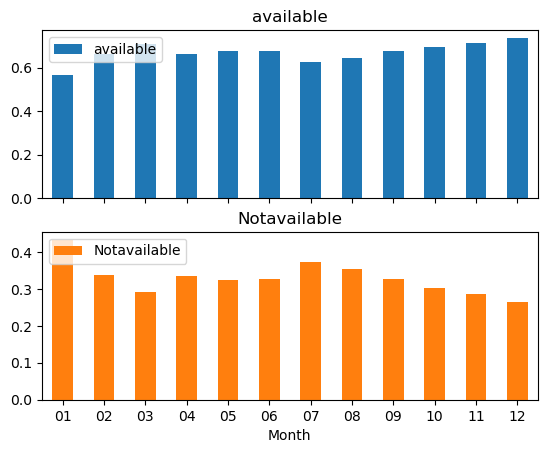

In [14]:
#df_cal_1["available"].isnull().any()
Availability_per_month=df_cal_1.groupby(['Month'], as_index=True).mean()[['available']]
NonAvailability_per_month=1-df_cal_1.groupby(['Month'], as_index=True).mean()[['available']]
NonAvailability_per_month=NonAvailability_per_month.rename(columns={'available': 'Notavailable'})
contact_df=pd.merge(Availability_per_month , NonAvailability_per_month, on="Month")
print(contact_df)
axes = contact_df.plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)
#Availability_per_month.plot(kind='bar',title='How busy Seattle is monthly',
#               ylabel='Ratio of days available', xlabel='Month', figsize=(10, 6), subplots=True)
#axes[1].legend(loc=2)

In [15]:
Availability_per_month

,available
Month,
01,0.566937
02,0.662208
03,0.709187
04,0.663847
05,0.675670
06,0.674384
07,0.627097
08,0.645051
09,0.674402


It seems that the end of the year (Nov and Dec) is the most popular time to travel to Seattle, as availability of places for rent increases to about 73%. Christmas and New year holidays seem to play a role for such behaviour. However, availability in January decreases significantly, which may reflect this fact that people go back to work and the number of travels decreases.

<Axes: title={'center': 'How busy Seattle is yearly'}, xlabel='Year', ylabel='Ratio of days booked'>

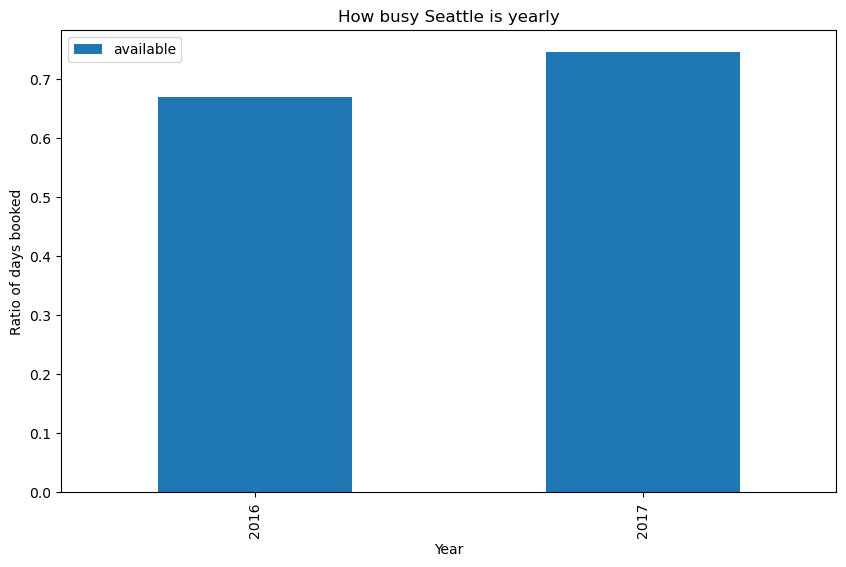

In [16]:
Availability_per_year=df_cal_1.groupby(['Year'], as_index=True).mean()[["available"]]
Availability_per_year.plot(kind='bar',title='How busy Seattle is yearly',
               ylabel='Ratio of days booked', xlabel='Year', figsize=(10, 6))

In [17]:
year_2017=df_cal_1[df_cal_1['Year']=='2017']
print(year_2017['Month'].unique())
print(year_2017.shape)
print(year_2017[year_2017["available"]==False].shape)


['01']
(7636, 6)
(1938, 6)


There is a big difference between 2016 and 2017. Therefore, it seems that Seattle experienced a busy year in 2017. However, more investigation shows that we only have data for Jan of 2017 and not the rest of the year. So, I looked into 2016 anlone to see how the booking ratio distribution looks like for months in 2016.  

(1385934, 6)
(457090, 6)
       available
Month           
12      0.735573
11      0.713986
03      0.709187
10      0.696514
05      0.675670
09      0.674402
06      0.674384
04      0.663847
02      0.662208
08      0.645051
07      0.627097
01      0.554133


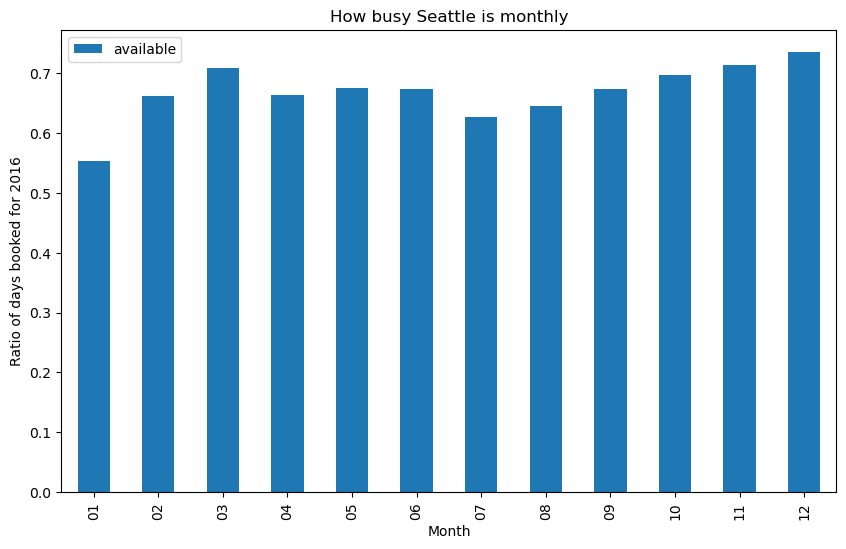

In [18]:
year_2016=df_cal_1[df_cal_1['Year']=='2016']
year_2016['Month'].unique()
print(year_2016.shape)
print(year_2016[year_2016["available"]==False].shape)
Availability_per_month2016=year_2016.groupby(['Month'], as_index=True).mean()[["available"]]
Availability_per_month2016.plot(kind='bar',title='How busy Seattle is monthly',
               ylabel='Ratio of days booked for 2016', xlabel='Month', figsize=(10, 6))

print(Availability_per_month2016.sort_values(['available'], ascending=False))

Again, it seems that Dec and Nov are the most popular times to visit Seattle followed by March. SOme explanation for the third month of the year can be the start of spring. 

## Prices:

In [19]:
#Here we check if there is differences in pricing of each listing_id (each property)
df_cal_1[df_cal_1['listing_id']==5682].dropna().head(20)

,listing_id,date,available,price,Year,Month
790597,5682,2016-01-11,True,$50.00,2016,01
790598,5682,2016-01-12,True,$50.00,2016,01
790599,5682,2016-01-13,True,$50.00,2016,01
790600,5682,2016-01-14,True,$50.00,2016,01
790601,5682,2016-01-15,True,$50.00,2016,01
790605,5682,2016-01-19,True,$49.00,2016,01
790606,5682,2016-01-20,True,$49.00,2016,01
790612,5682,2016-01-26,True,$50.00,2016,01
790613,5682,2016-01-27,True,$50.00,2016,01
790617,5682,2016-01-31,True,$50.00,2016,01


In [20]:
df_cal_1['price']=df_cal_1['price'].replace('[\$\,]', '', regex=True).astype(float)
df_cal_1.groupby(['listing_id'], as_index=True).mean()[['price']]

,price
listing_id,
3335,120.000000
4291,82.000000
5682,53.944984
6606,92.849315
7369,85.000000
...,...
10332096,40.000000
10334184,120.000000
10339144,NaN


It seems that pricing for a particular listing_id can be different for different times (different days or months). 

            price
Month            
07     152.094150
08     150.656594
06     147.473137
09     143.255949
05     139.538183
12     137.251835
10     137.031939
11     135.688738
04     135.097005
03     128.644488
02     124.293927
01     122.912176


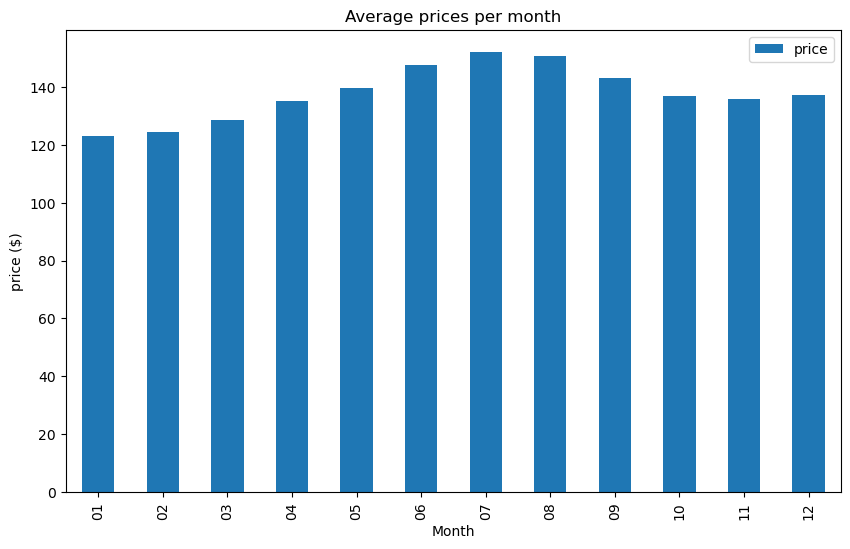

In [21]:
#finding average pricing for available days
df_cal_avail=df_cal_1[df_cal_1['available']==True]
Pricing_per_month=df_cal_avail.groupby(['Month'], as_index=True).mean()[["price"]]
Pricing_per_month.plot(kind='bar',title='Average prices per month',
               ylabel='price ($)', xlabel='Month', figsize=(10, 6))
print(Pricing_per_month.sort_values(['price'], ascending=False))

<Axes: title={'center': 'Average prices per year'}, xlabel='Year', ylabel='price ($)'>

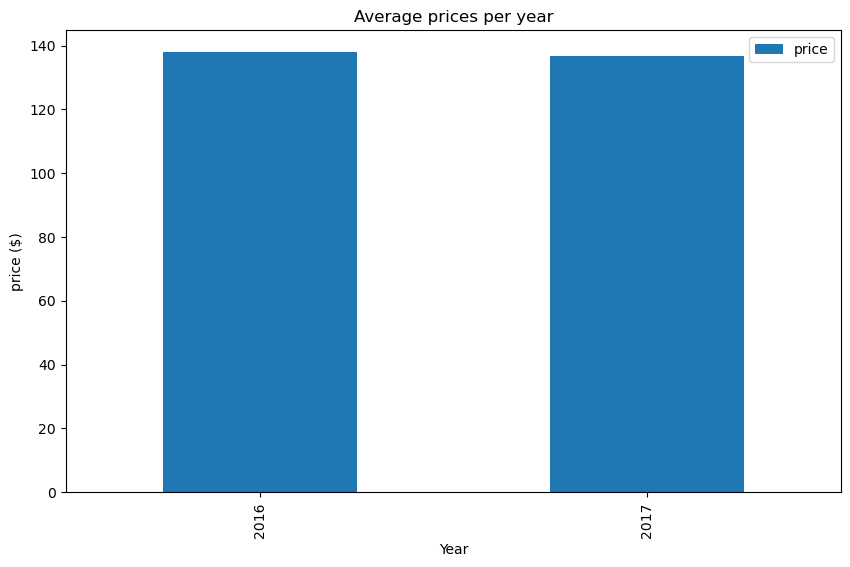

In [22]:
price_per_year=df_cal_avail.groupby(['Year'], as_index=True).mean()[["price"]]
price_per_year.plot(kind='bar',title='Average prices per year',
               ylabel='price ($)', xlabel='Year', figsize=(10, 6))

In [23]:
year_2017=df_cal_avail[df_cal_avail['Year']=='2017']
Pricing_per_month=year_2017.groupby(['Month'], as_index=True).mean()[["price"]]
Pricing_per_month

,price
Month,
01,136.88259


            price
Month            
07     152.094150
08     150.656594
06     147.473137
09     143.255949
05     139.538183
12     137.251835
10     137.031939
11     135.688738
04     135.097005
03     128.644488
02     124.293927
01     121.568409


<Axes: title={'center': 'Monthly average prices per month'}, xlabel='Month', ylabel='price ($)'>

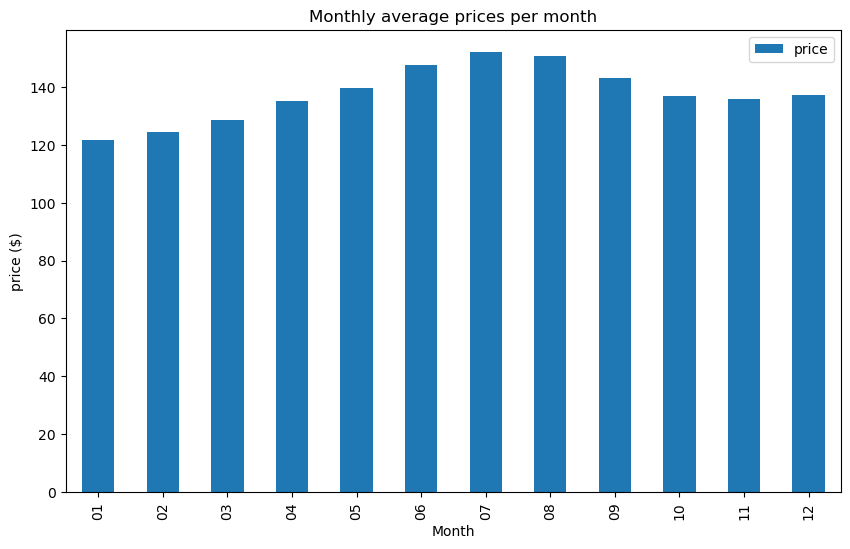

In [24]:
year_2016=df_cal_avail[df_cal_avail['Year']=='2016']
Pricing_per_month=year_2016.groupby(['Month'], as_index=True).mean()[["price"]]
print(Pricing_per_month.sort_values(['price'], ascending=False))
Pricing_per_month.plot(kind='bar',title='Monthly average prices per month',
               ylabel='price ($)', xlabel='Month', figsize=(10, 6))

In terms of prices:
Firstly, the average price in Jan 2017 increased compared to Jan 2016 (\\$136.88259  compared to \$121.568409).
Secondly, in 2016 we had a price spike around June, July and August which is the summer time (travel time), while the lower average price belongs to Jan, Feb and March. Therefore it seems the best time for travel to Seattle with lower cost is around March, with high availability and low price.

## Seattle neighborhood:

In [57]:
# Here we find columns with the word "neighbour" in it to find which columns in the list dataset include information regarding the neighbourhood vibe and description for our analysis
Neighborhood=[]
for item in df_list.columns:
    if "neighbo" in item:
        #print(item)
        Neighborhood.append(item)
Neighborhood.append('zipcode')
Neighborhood

['neighborhood_overview',
 'host_neighbourhood',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'zipcode']

In [4]:
df_list[Neighborhood]

,neighborhood_overview,host_neighbourhood,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode
0,NaN,Queen Anne,Queen Anne,West Queen Anne,Queen Anne,98119
1,"Queen Anne is a wonderful, truly functional vi...",Queen Anne,Queen Anne,West Queen Anne,Queen Anne,98119
2,Upper Queen Anne is a charming neighborhood fu...,Queen Anne,Queen Anne,West Queen Anne,Queen Anne,98119
3,NaN,Queen Anne,Queen Anne,West Queen Anne,Queen Anne,98119
4,We are in the beautiful neighborhood of Queen ...,Queen Anne,Queen Anne,West Queen Anne,Queen Anne,98119
...,...,...,...,...,...,...
3813,We're located near lots of family fun. Woodlan...,Holly,Fremont,Fremont,Other neighborhoods,98107
3814,The neighborhood is a quiet oasis that is clos...,Portage Bay,Portage Bay,Portage Bay,Capitol Hill,98102
3815,NaN,NaN,NaN,Rainier Beach,Rainier Valley,98178
3816,Madison Park offers a peaceful slow pace upsca...,NaN,NaN,Madison Park,Capitol Hill,98112


In [58]:
#df_list['neighborhood_overview'].values.astype('U')
# remove nans
#df_list_noNan['neighborhood_overview']=df_list['neighborhood_overview'].replace('NaN', np.nan)
df_list=df_list.dropna(subset=['neighborhood_overview'], axis=0)
df_list['neighborhood_overview'].head(20)

1     Queen Anne is a wonderful, truly functional vi...
2     Upper Queen Anne is a charming neighborhood fu...
4     We are in the beautiful neighborhood of Queen ...
5     This part of Queen Anne has wonderful views an...
6     Close restaurants, coffee shops and grocery st...
7     We are centrally located between Downtown and ...
8     Walking Score: 92 4 blocks from Kerry Park Fam...
9     Queen Anne is a wonderful, truly functional vi...
10    Queen Anne Hill is a wonderful and historic ar...
11    I am located in the Upper Queen Anne neighborh...
12    This neighborhood is one of Seattle's popular ...
13    Queen Anne hill became a popular spot for the ...
14    Queen Anne is THE BEST and most desirable neig...
15    Queen Anne is a charming and very safe neighbo...
16    Lower Queen Anne is amazing - you can walk to ...
17    We are located in Upper Queen Anne in walking ...
19    Upper Queen Anne is a charming neighborhood wi...
20    Lower Queen Anne is near the Seattle Cente

In [59]:
#Create vocabulary of all the words in our data
import re
# Remove punctuations, numbers and special characters
df_list['neighborhood_overview_processed'] = df_list['neighborhood_overview'].map(lambda x: re.sub('[(),--;:*\"\'\+\#\$\.!?]', '', str(x)))
df_list['neighborhood_overview_processed'] = df_list['neighborhood_overview_processed'].map(lambda x: re.sub('[\-/]', ' ', str(x)))
df_list['neighborhood_overview_processed'] = df_list['neighborhood_overview_processed'].map(lambda x: re.sub("[0-9]","", str(x)))
# Convert the titles to lowercase
df_list['neighborhood_overview_processed'] = df_list['neighborhood_overview_processed'].map(lambda x: x.lower())
# Print out the first rows
df_list['neighborhood_overview_processed'].head(20)


<>:4: DeprecationWarning: invalid escape sequence '\+'
<>:5: DeprecationWarning: invalid escape sequence '\-'
<>:4: DeprecationWarning: invalid escape sequence '\+'
<>:5: DeprecationWarning: invalid escape sequence '\-'
C:\Users\Mahmood N\AppData\Local\Temp\ipykernel_10288\2824232572.py:4: DeprecationWarning: invalid escape sequence '\+'
  df_list['neighborhood_overview_processed'] = df_list['neighborhood_overview'].map(lambda x: re.sub('[(),--;:*\"\'\+\#\$\.!?]', '', str(x)))
C:\Users\Mahmood N\AppData\Local\Temp\ipykernel_10288\2824232572.py:5: DeprecationWarning: invalid escape sequence '\-'
  df_list['neighborhood_overview_processed'] = df_list['neighborhood_overview_processed'].map(lambda x: re.sub('[\-/]', ' ', str(x)))


1     queen anne is a wonderful truly functional vil...
2     upper queen anne is a charming neighborhood fu...
4     we are in the beautiful neighborhood of queen ...
5     this part of queen anne has wonderful views an...
6     close restaurants coffee shops and grocery sto...
7     we are centrally located between downtown and ...
8     walking score   blocks from kerry park famous ...
9     queen anne is a wonderful truly functional vil...
10    queen anne hill is a wonderful and historic ar...
11    i am located in the upper queen anne neighborh...
12    this neighborhood is one of seattles popular c...
13    queen anne hill became a popular spot for the ...
14    queen anne is the best and most desirable neig...
15    queen anne is a charming and very safe neighbo...
16    lower queen anne is amazing  you can walk to e...
17    we are located in upper queen anne in walking ...
19    upper queen anne is a charming neighborhood wi...
20    lower queen anne is near the seattle cente

C:\Users\Mahmood N\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
C:\Users\Mahmood N\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


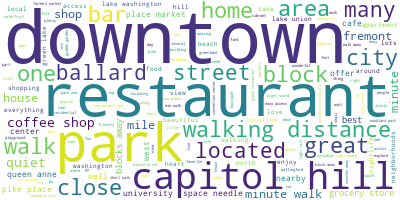

In [60]:
#Before moving on with further analysis we want to make sure that the preprocessing of the text data is done properly and no more preprocessing is needed
# Import the wordcloud library to get a visual representation of most common words
#!pip install --upgrade wordcloud
#!pip install --upgrade pip
#!pip install --upgrade pillow
#==9.5.0
#8.0.0
#9.4.0
#9.5.0
from wordcloud import WordCloud
from PIL import Image, ImageDraw, ImageFont

# Join the different processed titles together.
long_string = ','.join(list(df_list['neighborhood_overview_processed'].values))
#long_string
# Create a WordCloud object
stop_words=['neighborhood', 'seattle','seattles', 'will', 'lot', 'within']+list(WordCloud().stopwords)
wordcloud = WordCloud(stopwords=stop_words, background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud=wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

#print(list(WordCloud().stopwords)[:30])


# create an image
#image= Image.open("hopper.png").convert("RGBA")
#d=ImageDraw.Draw(image)
## draw text, half opacity
#d.text((6, 6), "Hello", fill=(255, 255, 255, 128))
#image.show()

From the word cloud visualization it can be seen that the most frequent words used to describe the neighborhoods are "downtown", "restaurant", "capitol hill", "park", "walking distance", "coffee shop", "walk area". A general impression from this analysis is that most of the descriptions point out to a neighbourhood located in the downtown Seattle, specially the residential district of the Capitol Hill. As the plot shows, the activity in this neighbourhood includes going to restaurants, coffee shops, and parks, which are in walking distance to most of the aiarbnb listing properties. However, to get a deeper insight from this word cloud, I did topic modelling.

In [61]:
#!pip install gensim

import gensim
from gensim.utils import simple_preprocess
from collections import Counter

# 1)Tokenizing
data_words=[]
for line in df_list['neighborhood_overview']:
    data_words += list(simple_preprocess(line))
word_count=Counter(data_words)
print(word_count.most_common())

C:\Users\Mahmood N\anaconda3\Lib\site-packages\botocore\utils.py:15: DeprecationWarning: 'cgi' is deprecated and slated for removal in Python 3.13
  import cgi
C:\Users\Mahmood N\anaconda3\Lib\site-packages\botocore\httpsession.py:41: DeprecationWarning: 'urllib3.contrib.pyopenssl' module is deprecated and will be removed in a future release of urllib3 2.x. Read more in this issue: https://github.com/urllib3/urllib3/issues/2680
  from urllib3.contrib.pyopenssl import orig_util_SSLContext as SSLContext


[('the', 8111), ('and', 7157), ('to', 4293), ('of', 4112), ('is', 3894), ('seattle', 2372), ('in', 2190), ('neighborhood', 1700), ('you', 1576), ('are', 1515), ('restaurants', 1478), ('from', 1337), ('walk', 1308), ('with', 1229), ('downtown', 1182), ('for', 1137), ('park', 1064), ('it', 1026), ('on', 992), ('or', 933), ('away', 893), ('blocks', 879), ('hill', 856), ('great', 845), ('we', 836), ('walking', 796), ('just', 778), ('shops', 761), ('there', 729), ('lake', 701), ('coffee', 674), ('within', 646), ('as', 637), ('all', 624), ('center', 602), ('market', 601), ('city', 600), ('bars', 594), ('our', 572), ('minute', 563), ('this', 563), ('place', 562), ('at', 556), ('one', 531), ('has', 530), ('located', 530), ('close', 524), ('minutes', 518), ('that', 509), ('also', 506), ('distance', 505), ('can', 497), ('ballard', 486), ('capitol', 484), ('quiet', 475), ('many', 473), ('street', 463), ('miles', 442), ('pike', 431), ('fremont', 431), ('area', 430), ('washington', 424), ('bus', 42

In [62]:
# 2) Remove stop words 
# These words are common words (e.g. "the", "and", "to", etc.) that are used in a language which 
# are not specific to the text or do not convey specific meaning/concept regarding our text/neighbourhood description.
# Therefore here we remove them from our list:
cleaned_data_words= [word for word in data_words if word not in stop_words]
cleaned_word_count=Counter(cleaned_data_words)
print(cleaned_word_count.most_common())

[('restaurants', 1478), ('walk', 1308), ('downtown', 1182), ('park', 1064), ('away', 893), ('blocks', 879), ('hill', 856), ('great', 845), ('walking', 796), ('shops', 761), ('lake', 701), ('coffee', 674), ('center', 602), ('market', 601), ('city', 600), ('bars', 594), ('minute', 563), ('place', 562), ('one', 531), ('located', 530), ('close', 524), ('minutes', 518), ('distance', 505), ('ballard', 486), ('capitol', 484), ('quiet', 475), ('many', 473), ('street', 463), ('miles', 442), ('pike', 431), ('fremont', 431), ('area', 430), ('washington', 424), ('bus', 423), ('university', 406), ('mile', 393), ('grocery', 385), ('easy', 378), ('parks', 374), ('best', 366), ('district', 363), ('home', 353), ('beach', 349), ('access', 331), ('house', 324), ('food', 323), ('shopping', 322), ('block', 311), ('local', 303), ('neighborhoods', 288), ('space', 286), ('queen', 283), ('west', 279), ('short', 279), ('nearby', 274), ('well', 274), ('anne', 273), ('art', 266), ('location', 261), ('drive', 259)

In [63]:
import gensim.corpora as corpora
# Create Dictionary
#print(cleaned_data_words)
id2word = corpora.Dictionary([cleaned_data_words])
#Create corpus
texts=[cleaned_data_words]
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:]]


[(0, 1), (1, 1), (2, 3), (3, 2), (4, 1), (5, 1), (6, 4), (7, 21), (8, 1), (9, 18), (10, 2), (11, 7), (12, 18), (13, 3), (14, 2), (15, 1), (16, 1), (17, 14), (18, 1), (19, 1), (20, 331), (21, 4), (22, 4), (23, 39), (24, 6), (25, 6), (26, 1), (27, 2), (28, 1), (29, 1)]


[[('aaa', 1),
  ('ab', 1),
  ('abbey', 3),
  ('abc', 2),
  ('abiance', 1),
  ('abilities', 1),
  ('ability', 4),
  ('able', 21),
  ('aboard', 1),
  ('abound', 18),
  ('absolute', 2),
  ('absolutely', 7),
  ('abundance', 18),
  ('abundant', 3),
  ('abuts', 2),
  ('abutting', 1),
  ('abuzz', 1),
  ('academic', 14),
  ('academy', 1),
  ('acceptable', 1),
  ('access', 331),
  ('accessed', 4),
  ('accessibility', 4),
  ('accessible', 39),
  ('accessing', 6),
  ('acclaimed', 6),
  ('acclimate', 1),
  ('accommodate', 2),
  ('accompanying', 1),
  ('accomplished', 1),
  ('according', 5),
  ('accounted', 1),
  ('acoustic', 1),
  ('acre', 12),
  ('acres', 9),
  ('across', 136),
  ('act', 3),
  ('action', 17),
  ('active', 21),
  ('activities', 77),
  ('activity', 10),
  ('actors', 2),
  ('acts', 1),
  ('actually', 2),
  ('acupuncture', 1),
  ('ada', 3),
  ('adaptive', 2),
  ('add', 10),
  ('added', 1),
  ('addicted', 1),
  ('adding', 2),
  ('addition', 26),
  ('additionally', 5),
  ('address', 4)

In [72]:
# 3) Build LDA model
from pprint import pprint
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=3) # num_topics=10
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"restaurants" + 0.014*"walk" + 0.013*"downtown" + 0.011*"park" + '
  '0.009*"great" + 0.009*"hill" + 0.008*"away" + 0.008*"blocks" + '
  '0.008*"shops" + 0.007*"walking"'),
 (1,
  '0.013*"restaurants" + 0.013*"park" + 0.011*"blocks" + 0.010*"downtown" + '
  '0.010*"walk" + 0.010*"away" + 0.009*"lake" + 0.008*"hill" + 0.008*"walking" '
  '+ 0.008*"great"'),
 (2,
  '0.018*"restaurants" + 0.016*"walk" + 0.013*"downtown" + 0.010*"away" + '
  '0.009*"walking" + 0.009*"hill" + 0.009*"blocks" + 0.008*"great" + '
  '0.008*"park" + 0.008*"shops"')]


In [73]:
# 4) Analyse LDA model output
# Here we visualise the LDA model output so we can interpret the model results
#!pip install pyLDAvis
#!pip install --upgrade pyLDAvis==3.4.1
#!pip install --upgrade pandas==1.5.1
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis
import os
import pickle 


# Visualize the topics
num_topics=3 # I started with 10 topics but decreased it to 3
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# if statement when it is the first time you want to execute visualization prep 
# Stop if condition if you just want to open a saved LDAvis_prepared
firsttime=False
if firsttime :
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.003787  0.000867       1        1  66.928866
1      0.001054 -0.003366       2        1  20.842083
2      0.002734  0.002499       3        1  12.229051, topic_info=             Term         Freq        Total Category  logprob  loglift
4621  restaurants  1355.000000  1355.000000  Default  30.0000  30.0000
6048         walk  1241.000000  1241.000000  Default  29.0000  29.0000
1640     downtown  1130.000000  1130.000000  Default  28.0000  28.0000
346          away   797.000000   797.000000  Default  27.0000  27.0000
583        blocks   795.000000   795.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
4163        place    54.613375   572.534403   Topic3  -5.3299  -0.2484
3358       market    55.230312   597.854443   Topic3  -5.3187  -0.2805
248          area    47.574504   428.837125   Topic3  -5.4679  -0.0974
5880   university    45.814836   389.969627   Topic3  -5.5056  -0.0401
4394        quiet    47.334473   453.489220   Topic3  -5.4729  -0.1584

[271 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
20        1  0.713932    access
20        2  0.152763    access
20        3  0.134057    access
63        1  0.510806  adorable
63        2  0.340537  adorable
...     ...       ...       ...
6242      2  0.308931      yard
6242      3  0.154466      yard
6289      1  0.518857      zoka
6289      2  0.389143      zoka
6289      3  0.129714      zoka

[513 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

As appears in the graph above, we have a big first topic for our text (neighbour description) which has no overlap with other topics and can mainly be distinguished by the terms highlighted on the bar chart on the right hand side of the graph, being: "Restaurants", "Walk", "downtown", "park", etc. I call this as "Downtown vibe" and it includes all activities such as "walking", "going to restautants", "coffee shops", "parks", being close to important Seattle neighborhoods such as "Ballard" and "Capitol Hill", and any other places such as "market" that are in "walking distance" from the airbnb places.

In [17]:
#import sklearn
#sklearn.__version__
pd.__version__


'1.5.3'

# Reviews

In [3]:
df_review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [4]:
# concatenate the string
#df_review['comments'] = df_review.groupby(['listing_id'])['comments'].transform(lambda x : ','.join(x))
#df_review.groupby(['listing_id'])['comments'].apply(' '.join).reset_index()
print(df_review.shape)
df_review=df_review.dropna(subset=['comments'])
print(df_review.shape)
#print(df_review.dtypes)
df_review_grouped=df_review.groupby(['listing_id'], as_index = False).agg({'comments': lambda x: ' '.join(filter(None,x))})
df_review_grouped.drop_duplicates()
df_review_grouped.head()
#df_review['comments'][0]

(84849, 6)
(84831, 6)


,listing_id,comments
0,4291,"We had a great stay in Seattle, great location..."
1,5682,Very sweet outgoing host with a nice family an...
2,6606,"The Urban Cottage is comfortable, beautiful, f..."
3,7369,I was staying with Shireen for a weekend and m...
4,9419,"If you love art, animals, and yoga, this is th..."


In [5]:
print(df_review_grouped.shape)
list(df_review_grouped[df_review_grouped['listing_id']==7202016]['comments'])

(3191, 2)


['Cute and cozy place. Perfect location to everything!  Kelly has a great room in a very central location. \r\nBeautiful building , architecture and a style that we really like. \r\nWe felt guite at home here and wish we had spent more time.\r\nWent for a walk and found Seattle Center with a major food festival in progress. What a treat.\r\nVisited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW.  Thanks for a great stay. Very spacious apartment, and in a great neighborhood.  This is the kind of apartment I wish I had!\r\n\r\nDidn\'t really get to meet Kelly until I was on my out, but she was always readily available by phone. \r\n\r\nI believe the only "issue" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolita

In [6]:
import re
# Remove punctuations, numbers and special characters
df_review_grouped['comments_processed'] = df_review_grouped['comments'].map(lambda x: re.sub('[(),--;:*+#$.\"\'!?]', '', str(x)))
df_review_grouped['comments_processed'] = df_review_grouped['comments_processed'].map(lambda x: re.sub('[\r\n]', '', str(x)))
df_review_grouped['comments_processed'] = df_review_grouped['comments_processed'].map(lambda x: re.sub('[-/]', ' ', str(x)))
df_review_grouped['comments_processed'] = df_review_grouped['comments_processed'].map(lambda x: re.sub("[0-9]","", str(x)))
# Convert the titles to lowercase
df_review_grouped['comments_processed'] = df_review_grouped['comments_processed'].map(lambda x: x.lower())
# Print out the first rows
list(df_review_grouped[df_review_grouped['listing_id']==7202016]['comments_processed'])[0]

'cute and cozy place perfect location to everything  kelly has a great room in a very central location beautiful building  architecture and a style that we really like we felt guite at home here and wish we had spent more timewent for a walk and found seattle center with a major food festival in progress what a treatvisited the space needle and the chihuly glass exhibit then pikes place market wow  thanks for a great stay very spacious apartment and in a great neighborhood  this is the kind of apartment i wish i haddidnt really get to meet kelly until i was on my out but she was always readily available by phone i believe the only issue if you want to call it that was finding a place to park but i sincerely doubt its easy to park anywhere in a residential area after  pm on a friday close to seattle center and all it has to offer  ballet theater museum space needle restaurants of all ilk just blocks away and the metropolitan probably the coolest grocer youll ever find easy to find and k

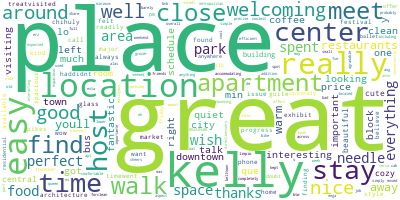

In [7]:
from wordcloud import WordCloud
from PIL import Image, ImageDraw, ImageFont

# Create a WordCloud object
stop_words=['neighborhood', 'seattle','seattles', 'will', 'lot', 'within']+list(WordCloud().stopwords)
wordcloud = WordCloud(stopwords=stop_words, background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
long_string=list(df_review_grouped[df_review_grouped['listing_id']==7202016]['comments_processed'])[0]
wordcloud=wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

As we can see, for example for listing_id=7202016, word "great" has been used very frequently, which reflects a positive review for this listing. On the other hand there are other words that are highlighted as the most frequently used in the reviews, which do not reflect emotional tone or sentiment expressed in a text. So, here we need to do sentimental analysis to decide wether a review was positive or negative. 

Here I use NLTK library for sentimental analysis. it requires some additional data to be downloaded before it can be used effectively. This data includes pre-trained models, corpora, and other resources that NLTK uses to perform various NLP tasks. I used points and steps from: https://www.datacamp.com/tutorial/text-analytics-beginners-nltk

In [8]:
#!pip install nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# download nltk corpus (first time only)
#nltk.download('all')



### Preprocess text:
Before we do any sentimental analysis we need to clean and prepare the data. So, as this stage we perform a series of techniques including tokenization, removal of the stop words (common words in the language), stemming, and lemmatization.

In [12]:
# Credit of this part, the function to clean and prepare the data goes to https://www.datacamp.com/tutorial/text-analytics-beginners-nltk
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text
    tokens = word_tokenize(text.lower())
    #print('Tokenize done!')
    
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    #print('Stop word removal done!')

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    #print('Laminization done!')

        
    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    #print('back to string done!')

    
    return processed_text

# apply the function df

for i in range(df_review_grouped.shape[0]):
    #print('item:', i)
    df_review_grouped['comments_processed'][i]=preprocess_text(df_review_grouped['comments_processed'][i])
#df_review_grouped['comments_processed'] = df_review_grouped['comments_processed'].apply(preprocess_text)
df_review_grouped

,listing_id,comments,comments_processed
0,4291,"We had a great stay in Seattle, great location...",great stay seattle great location room cleanth...
1,5682,Very sweet outgoing host with a nice family an...,sweet outgoing host nice family cute dog room ...
2,6606,"The Urban Cottage is comfortable, beautiful, f...",urban cottage comfortable beautiful fun really...
3,7369,I was staying with Shireen for a weekend and m...,staying shireen weekend stay way better everyt...
4,9419,"If you love art, animals, and yoga, this is th...",love art animal yoga place niece visiting port...
...,...,...,...
3186,9995551,Awesome host! The cottage is nice and clean an...,awesome host cottage nice clean jennifer provi...
3187,10012724,This is a prime location of walking distance t...,prime location walking distance main attractio...
3188,10020221,Awesome room! Thanks for the kindness and lett...,awesome room thanks kindness letting crash las...
3189,10118341,My mom and I came for a 4 day trip and had a g...,mom came day trip great stay elises place frie...


In [24]:
#For this part I got help from these pages: https://www.datacamp.com/tutorial/text-analytics-beginners-nltk 
# and https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/
# Here we can separate 3 tones: Positive, Negative, and Neutral and calculates the score separately for each tone

#df_review_grouped_backup=df_review_grouped

#The upper code block takes too long to run so after the first run I saved the output and read it here so we do not need to run the code block everytime
#df_review_grouped.to_pickle('df_review_grouped.pkl')    #to save the dataframe, df to 123.pkl
df_review_grouped_backup = pd.read_pickle('df_review_grouped.pkl') #to load 123.pkl back to the dataframe df


# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function
def get_sentiment(text):

    scores = analyzer.polarity_scores(text)
    sentiment_value_pos= scores['pos']  
    sentiment_value_neg = scores['neg']
    sentiment_value_neu = scores['neu']
        
     # decide sentiment as positive, negative and neutral
    if scores['compound'] >= 0.05 :
        sentiment="Positive"
 
    elif scores['compound'] <= - 0.05 :
        sentiment="Negative"
 
    else :
        sentiment="Neutral"
    #print(sentiment,sentiment_value_pos,sentiment_value_neg,sentiment_value_neu)
    return sentiment
# apply get_sentiment function

df_review_grouped_backup['sentiment'] = df_review_grouped_backup['comments_processed'].apply(get_sentiment)

df_review_grouped_backup

,listing_id,comments,comments_processed,sentiment
0,4291,"We had a great stay in Seattle, great location...",great stay seattle great location room cleanth...,Positive
1,5682,Very sweet outgoing host with a nice family an...,sweet outgoing host nice family cute dog room ...,Positive
2,6606,"The Urban Cottage is comfortable, beautiful, f...",urban cottage comfortable beautiful fun really...,Positive
3,7369,I was staying with Shireen for a weekend and m...,staying shireen weekend stay way better everyt...,Positive
4,9419,"If you love art, animals, and yoga, this is th...",love art animal yoga place niece visiting port...,Positive
...,...,...,...,...
3186,9995551,Awesome host! The cottage is nice and clean an...,awesome host cottage nice clean jennifer provi...,Positive
3187,10012724,This is a prime location of walking distance t...,prime location walking distance main attractio...,Positive
3188,10020221,Awesome room! Thanks for the kindness and lett...,awesome room thanks kindness letting crash las...,Positive
3189,10118341,My mom and I came for a 4 day trip and had a g...,mom came day trip great stay elises place frie...,Positive


In [25]:
df_review_grouped_backup['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [26]:
df_cal_1=df_cal
df_cal_1['price']=df_cal_1['price'].replace('[$,]', '', regex=True).astype(float)
df_cal_1['available'].replace({'f': False, 't': True}, inplace=True);
df_cal_avail=df_cal_1[df_cal_1['available']==True]
Pricing_per_listing=df_cal_avail.groupby(['listing_id'], as_index=True).mean()[["price"]]
contact_df2=pd.merge(Pricing_per_listing , df_review_grouped_backup, on="listing_id")
contact_df2

,listing_id,price,comments,comments_processed,sentiment
0,4291,82.000000,"We had a great stay in Seattle, great location...",great stay seattle great location room cleanth...,Positive
1,5682,53.944984,Very sweet outgoing host with a nice family an...,sweet outgoing host nice family cute dog room ...,Positive
2,6606,92.849315,"The Urban Cottage is comfortable, beautiful, f...",urban cottage comfortable beautiful fun really...,Positive
3,7369,85.000000,I was staying with Shireen for a weekend and m...,staying shireen weekend stay way better everyt...,Positive
4,9419,85.616438,"If you love art, animals, and yoga, this is th...",love art animal yoga place niece visiting port...,Positive
...,...,...,...,...,...
3116,9995551,79.000000,Awesome host! The cottage is nice and clean an...,awesome host cottage nice clean jennifer provi...,Positive
3117,10012724,25.000000,This is a prime location of walking distance t...,prime location walking distance main attractio...,Positive
3118,10020221,55.000000,Awesome room! Thanks for the kindness and lett...,awesome room thanks kindness letting crash las...,Positive
3119,10118341,70.000000,My mom and I came for a 4 day trip and had a g...,mom came day trip great stay elises place frie...,Positive


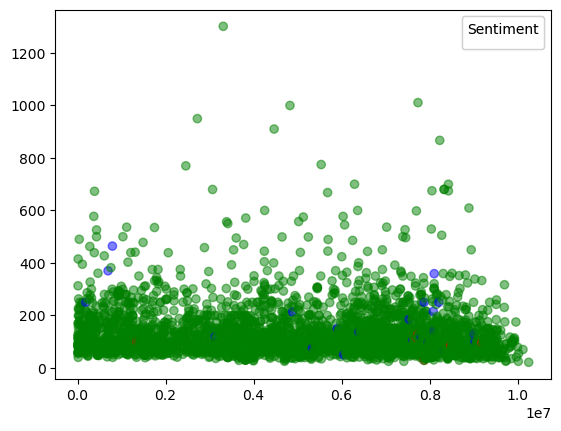

In [29]:
#import seaborn as sns
#sns.scatterplot('listing_id', 'price', data=contact_df2, hue='sentiment')
fig, ax = plt.subplots()
colors = {'Positive':'green', 'Negative':'red', 'Neutral':'blue'}
## Get Unique continents
##color_labels = contact_df2['sentiment'].unique()
## List of colors in the color palettes
##rgb_values = sns.color_palette("Set2", 4)
## Map continents to the colors
##color_map = dict(zip(color_labels, rgb_values))
#scatter=ax.scatter(contact_df2['listing_id'], contact_df2['price'], c=contact_df2['sentiment'].map(colors), s=contact_df2['sentiment']+20, alpha=0.3,) #, c=contact_df2['sentiment'].map(colors)

scatter=ax.scatter(contact_df2['listing_id'], contact_df2['price'], c=contact_df2['sentiment'].map(colors), alpha=0.5,) #, c=contact_df2['sentiment'].map(colors)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Sentiment")
ax.add_artist(legend1)
plt.show()


<Axes: >

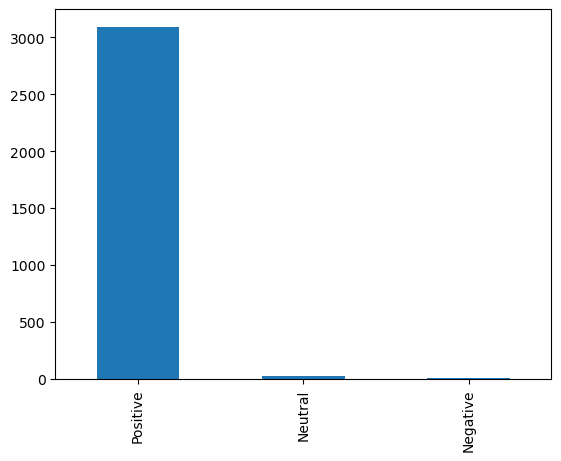

In [49]:
pd.value_counts(contact_df2['sentiment']).plot.bar()

Plot above shows that the number of positive reviews are significantly higher than the other two groups.

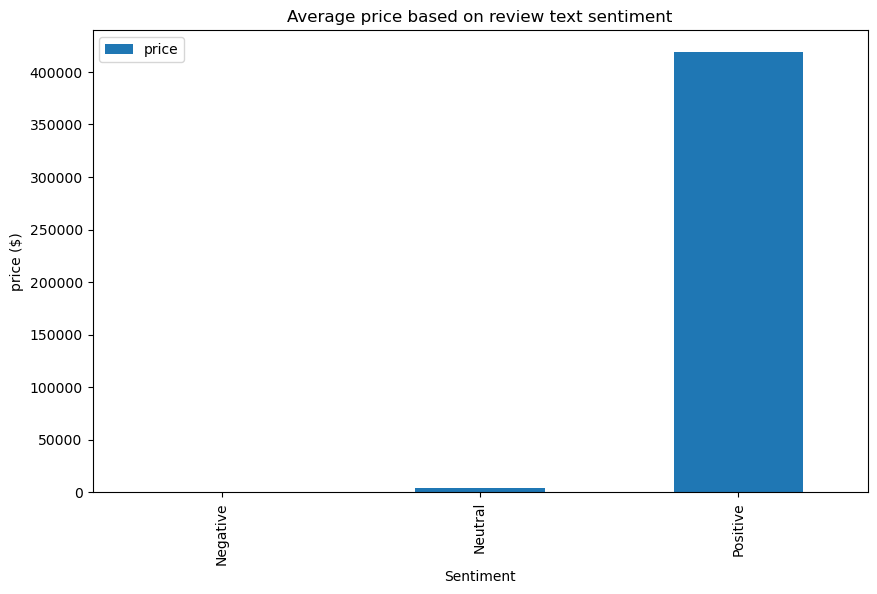

In [54]:
price_per_sentiment=contact_df2.groupby(['sentiment'], as_index=True)[["price"]].sum()
price_per_sentiment.plot(kind='bar',title='Total income based on review text sentiment',
               ylabel='price ($)', xlabel='Sentiment', figsize=(10, 6))
plt.show()

As shown in the bar chart, the total income from the airbnb places over the time when this data is gathered which has Positive reviewers' tone is the highest. As naturally expected places with negative reviews brought the lowest income. 

Now lets compare our results with the review scors from the list dataframe. 

In [33]:
print(df_list['review_scores_accuracy'].head())
print(df_list['review_scores_value'].head())
print(df_list['review_scores_value'].unique())

0    10.0
1    10.0
2    10.0
3     NaN
4     9.0
Name: review_scores_accuracy, dtype: float64
0    10.0
1    10.0
2    10.0
3     NaN
4     9.0
Name: review_scores_value, dtype: float64
[10. nan  9.  8.  7.  6.  4.  2.  5.]


It is not clear what the review_score_value stand for but as it appears, the value is in the range 0-10. And it might be the consolidated rating (including the place, the host, the neighborhood, etc.)

In [35]:
# This function categoze the review scores into three groups, Positive is the values is more than average (5.0), 
# Negative if it is less than average (5.0), and Neutral if otherwise
def categorize_review_score(score):
    if score > 5:
        return 'Positive'
    elif score < 5:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the review_scores_value column using the apply() function
df_list=df_list.dropna(subset=['review_scores_value'])
df_list['Score_category'] = df_list['review_scores_value'].apply(categorize_review_score)

# Print the resulting dataframe
print(df_list)

           id                           listing_url       scrape_id  \
0      241032   https://www.airbnb.com/rooms/241032  20160104002432   
1      953595   https://www.airbnb.com/rooms/953595  20160104002432   
2     3308979  https://www.airbnb.com/rooms/3308979  20160104002432   
4      278830   https://www.airbnb.com/rooms/278830  20160104002432   
5     5956968  https://www.airbnb.com/rooms/5956968  20160104002432   
...       ...                                   ...             ...   
3810   262764   https://www.airbnb.com/rooms/262764  20160104002432   
3811  8578490  https://www.airbnb.com/rooms/8578490  20160104002432   
3812  3383329  https://www.airbnb.com/rooms/3383329  20160104002432   
3813  8101950  https://www.airbnb.com/rooms/8101950  20160104002432   
3814  8902327  https://www.airbnb.com/rooms/8902327  20160104002432   

     last_scraped                                 name  \
0      2016-01-04         Stylish Queen Anne Apartment   
1      2016-01-04   Bright & Ai

In [38]:

contact_df3=pd.merge(contact_df2 , df_list[['id','Score_category']], left_on="listing_id", right_on="id")
contact_df3

,listing_id,price,comments,comments_processed,sentiment,id,Score_category
0,4291,82.000000,"We had a great stay in Seattle, great location...",great stay seattle great location room cleanth...,Positive,4291,Positive
1,5682,53.944984,Very sweet outgoing host with a nice family an...,sweet outgoing host nice family cute dog room ...,Positive,5682,Positive
2,6606,92.849315,"The Urban Cottage is comfortable, beautiful, f...",urban cottage comfortable beautiful fun really...,Positive,6606,Positive
3,7369,85.000000,I was staying with Shireen for a weekend and m...,staying shireen weekend stay way better everyt...,Positive,7369,Positive
4,9419,85.616438,"If you love art, animals, and yoga, this is th...",love art animal yoga place niece visiting port...,Positive,9419,Positive
...,...,...,...,...,...,...,...
3087,9970805,41.564384,"Emily's place was awesome, really centrally lo...",emilys place awesome really centrally located ...,Positive,9970805,Positive
3088,9995551,79.000000,Awesome host! The cottage is nice and clean an...,awesome host cottage nice clean jennifer provi...,Positive,9995551,Positive
3089,10012724,25.000000,This is a prime location of walking distance t...,prime location walking distance main attractio...,Positive,10012724,Positive
3090,10020221,55.000000,Awesome room! Thanks for the kindness and lett...,awesome room thanks kindness letting crash las...,Positive,10020221,Positive


<Axes: title={'center': ' '}, xlabel='Score_category', ylabel='price ($)'>

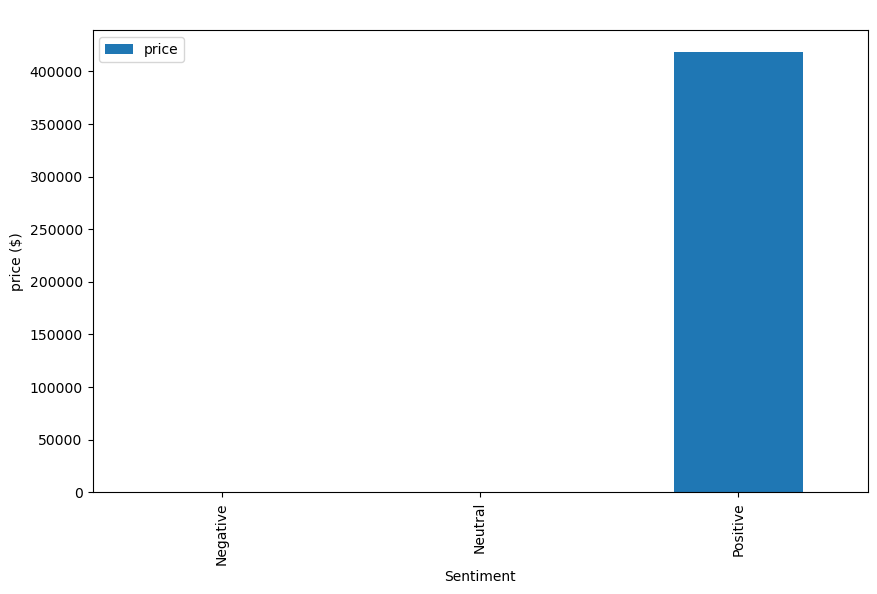

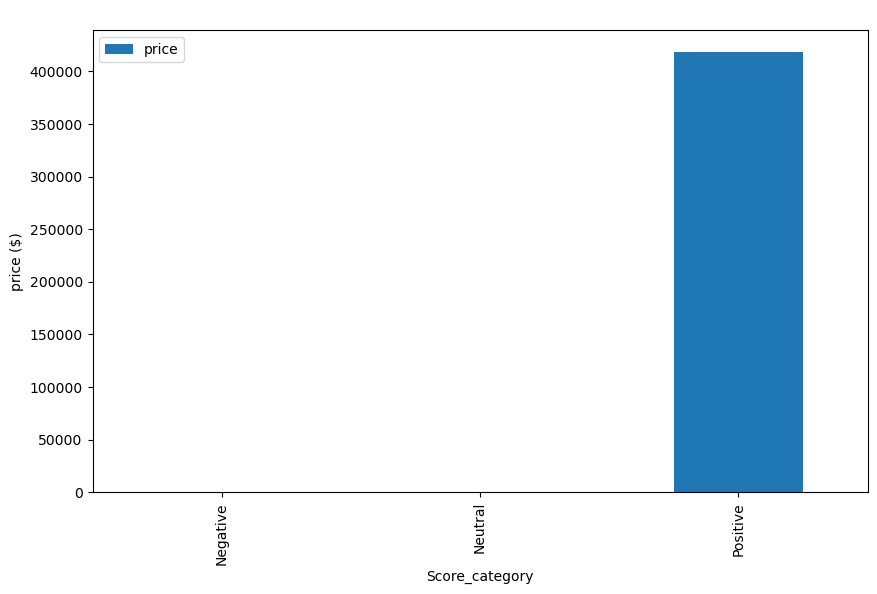

In [55]:
#price_per_sentiment=contact_df3.groupby(['sentiment','Score_category'], as_index=True).mean()[["price"]]
#price_per_sentiment.plot(kind='bar',title='Average prices per year',
#               ylabel='price ($)', xlabel='Year', figsize=(10, 6))
#plt.show()

df1=contact_df3.groupby(['sentiment'], as_index=True).sum()[["price"]]
df2=contact_df3.groupby(['Score_category'], as_index=True).sum()[["price"]]
df1.plot(kind='bar',title=' ',
               ylabel='price ($)', xlabel='Sentiment', figsize=(10, 6))
df2.plot(kind='bar',title=' ',
               ylabel='price ($)', xlabel='Score_category', figsize=(10, 6))

As it can be seen from the two bar charts above, the results are consistent in bother analysis. 